In [1]:
library(knitr)
library(dplyr)
library(Seurat)
library(reticulate)
library(scales)
library(DT)
set.seed(1234)
options(repr.plot.width=14, repr.plot.height=10)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘DT’


The following object is masked from ‘package:Seurat’:

    JS




In [3]:
arg01 <- "mca" #library name: tenx, dropseq, mca
arg02 <- "GSM3242184_Sample_DS39_gene_exon_tagged.dge.txt.gz" #10X directory, dropseq / mca count matrix
arg03 <- "ex2_1_analysis" #project name
arg04 <- "ex2_1.rds"  #output file name for saveRDS function

In [4]:
switch(arg01,
    "tenx" = tmp.data <- Read10X(data.dir = arg02),
    "dropseq" = tmp.data <- read.table(arg02, sep = "\t", header=T, row.names=1),
    "mca" = tmp.data <- read.table(arg02, sep = "\t", header=T, row.names=1),
    print("You have chosen undefined library parameter"))
tmp <- CreateSeuratObject(counts = tmp.data, project = arg03, min.cells = 3)
print(tmp)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
15621 features across 5000 samples within 1 assay 
Active assay: RNA (15621 features, 0 variable features)


Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


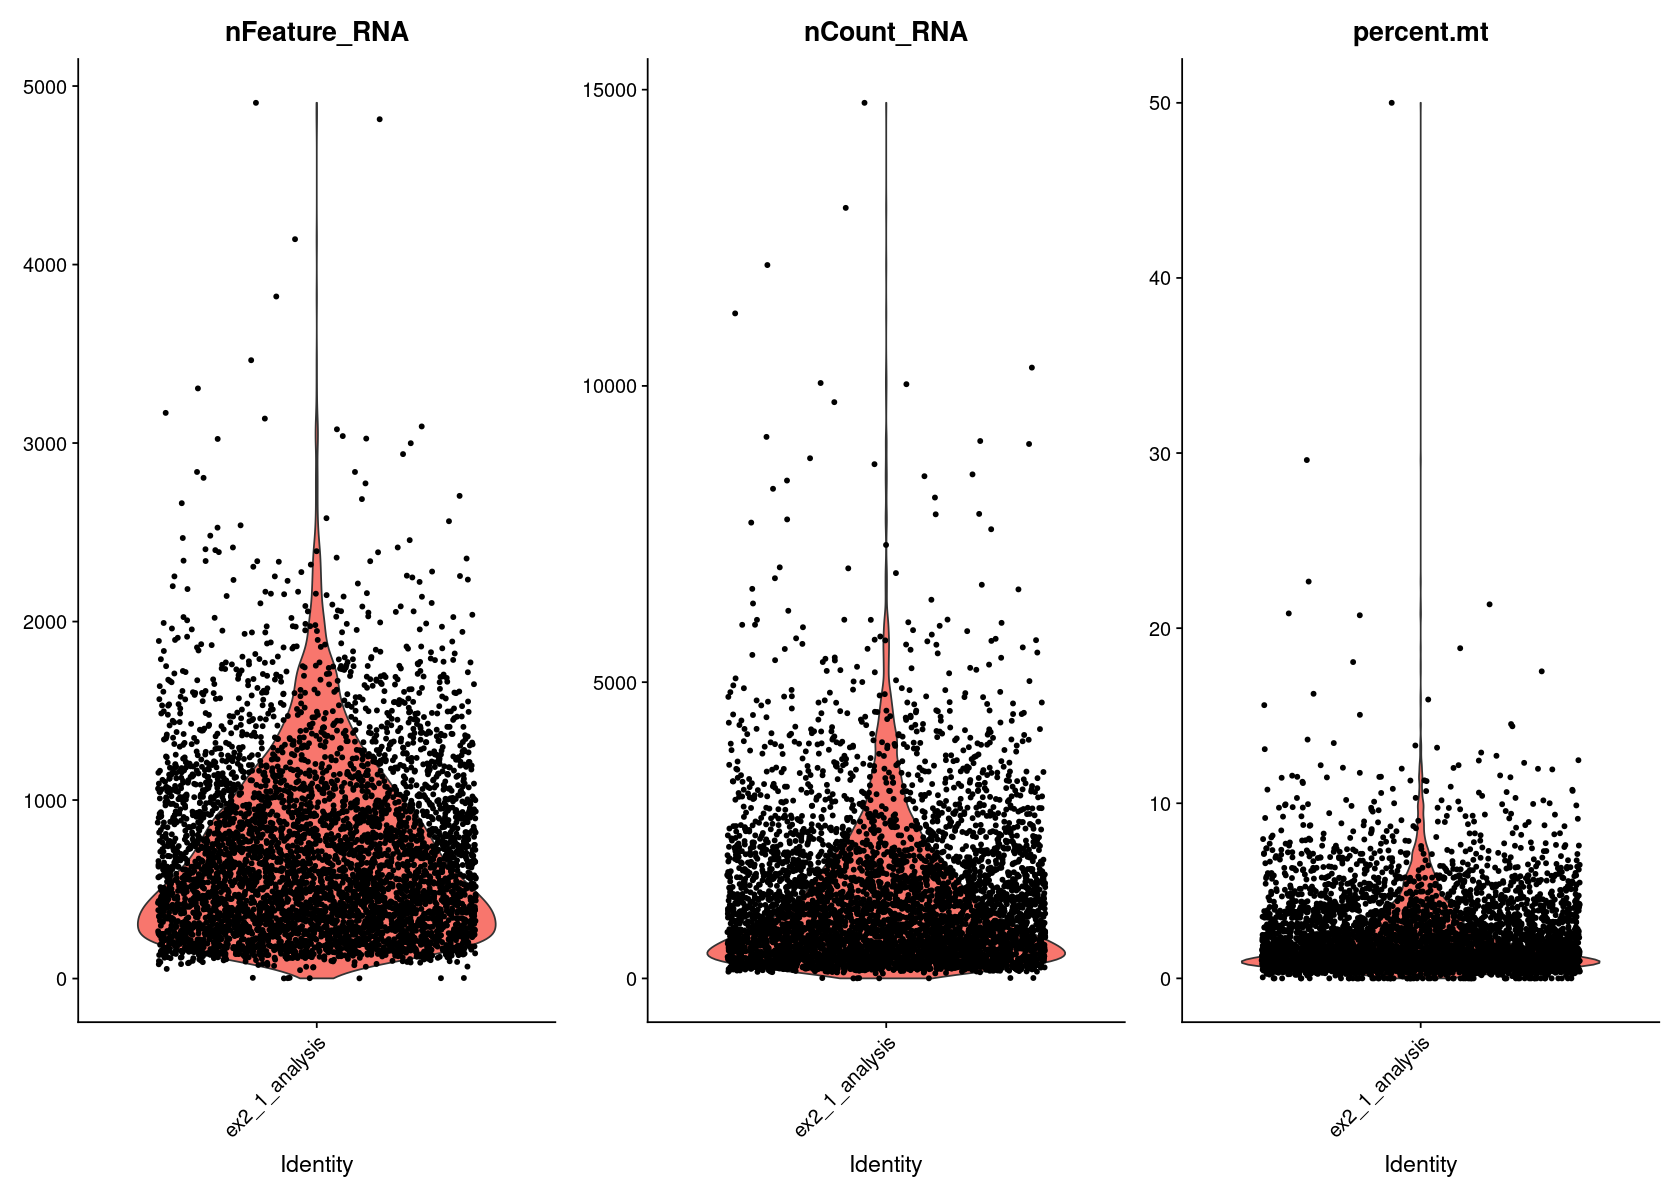

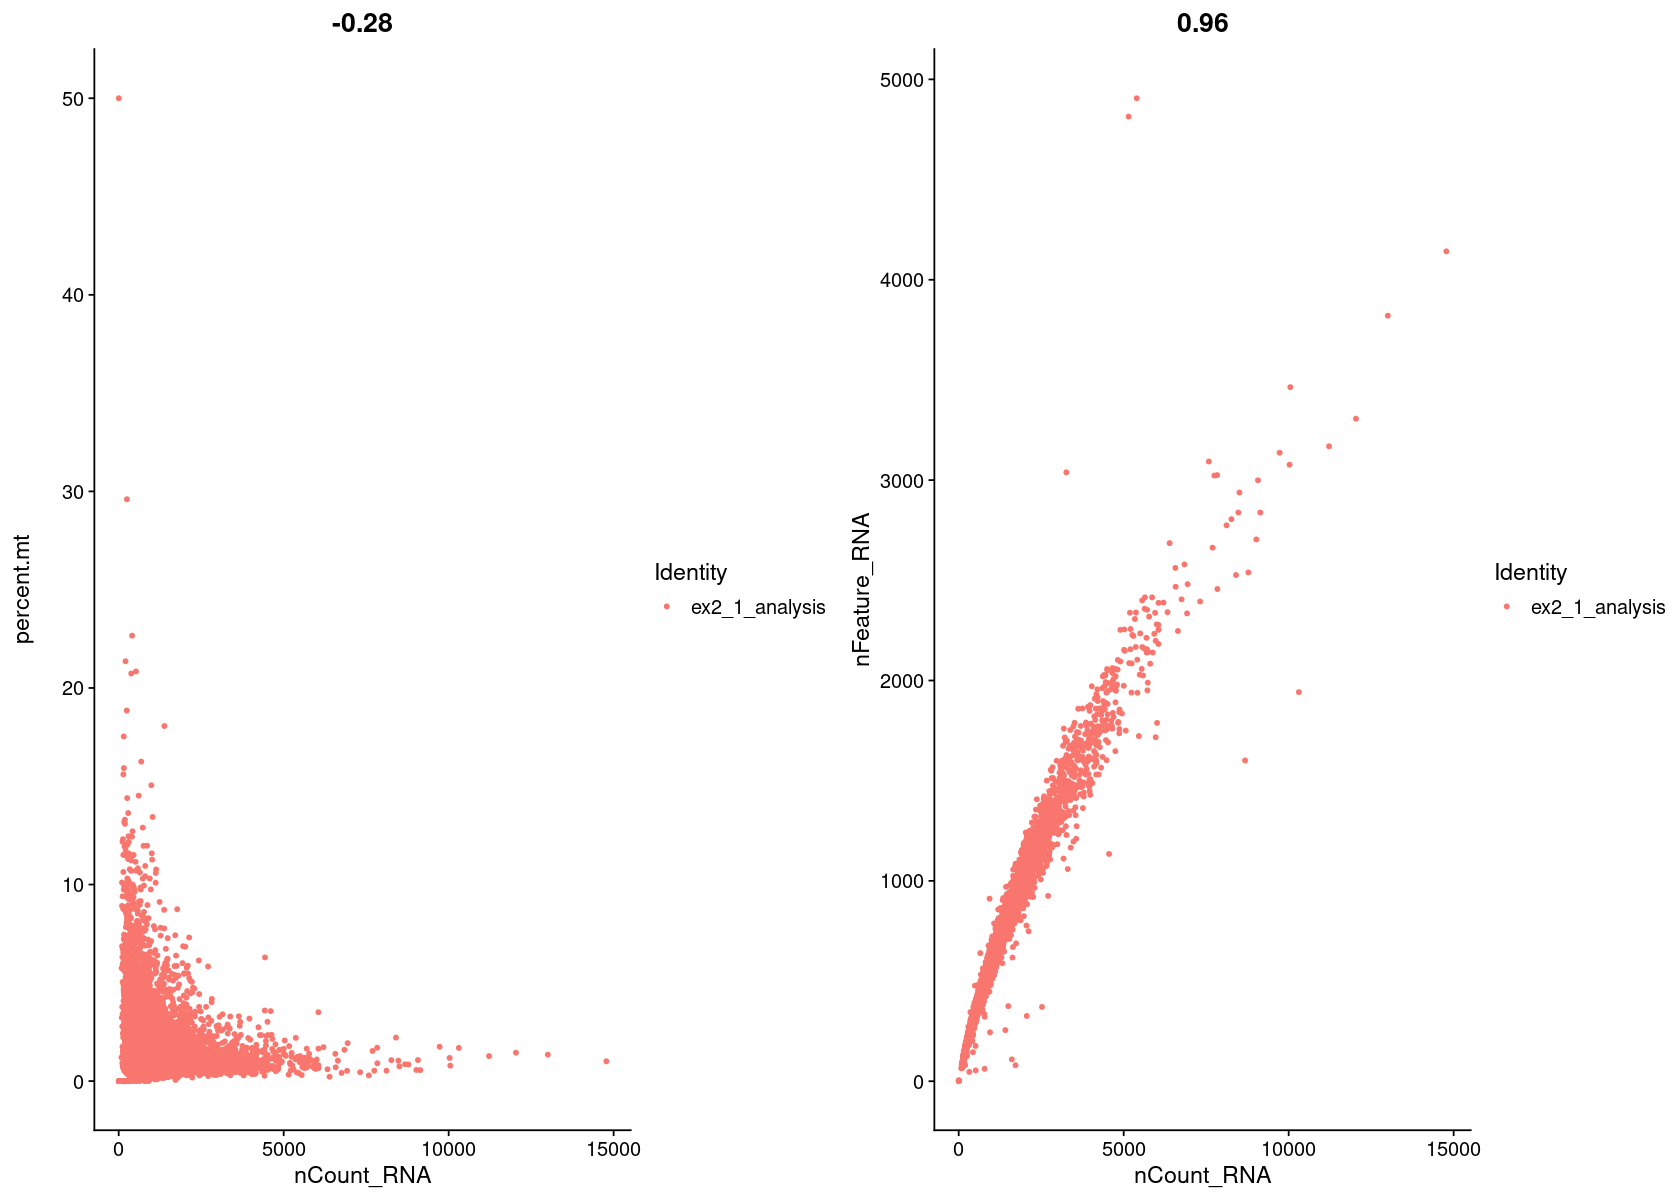

In [6]:
tmp[["percent.mt"]] <- PercentageFeatureSet(tmp, pattern="^mt-")
VlnPlot(tmp, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

plot1 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

In [7]:
arg05 <- 50 #nFeature_RNA_min
arg06 <- 3000 #nFeature_RNA_max
arg07 <- 10 #nCount_RNA_min
arg08 <- 10000 #nCount_RNA_max
arg09 <- 30 #percent.mt_max

An object of class Seurat 
15621 features across 4977 samples within 1 assay 
Active assay: RNA (15621 features, 0 variable features)


Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


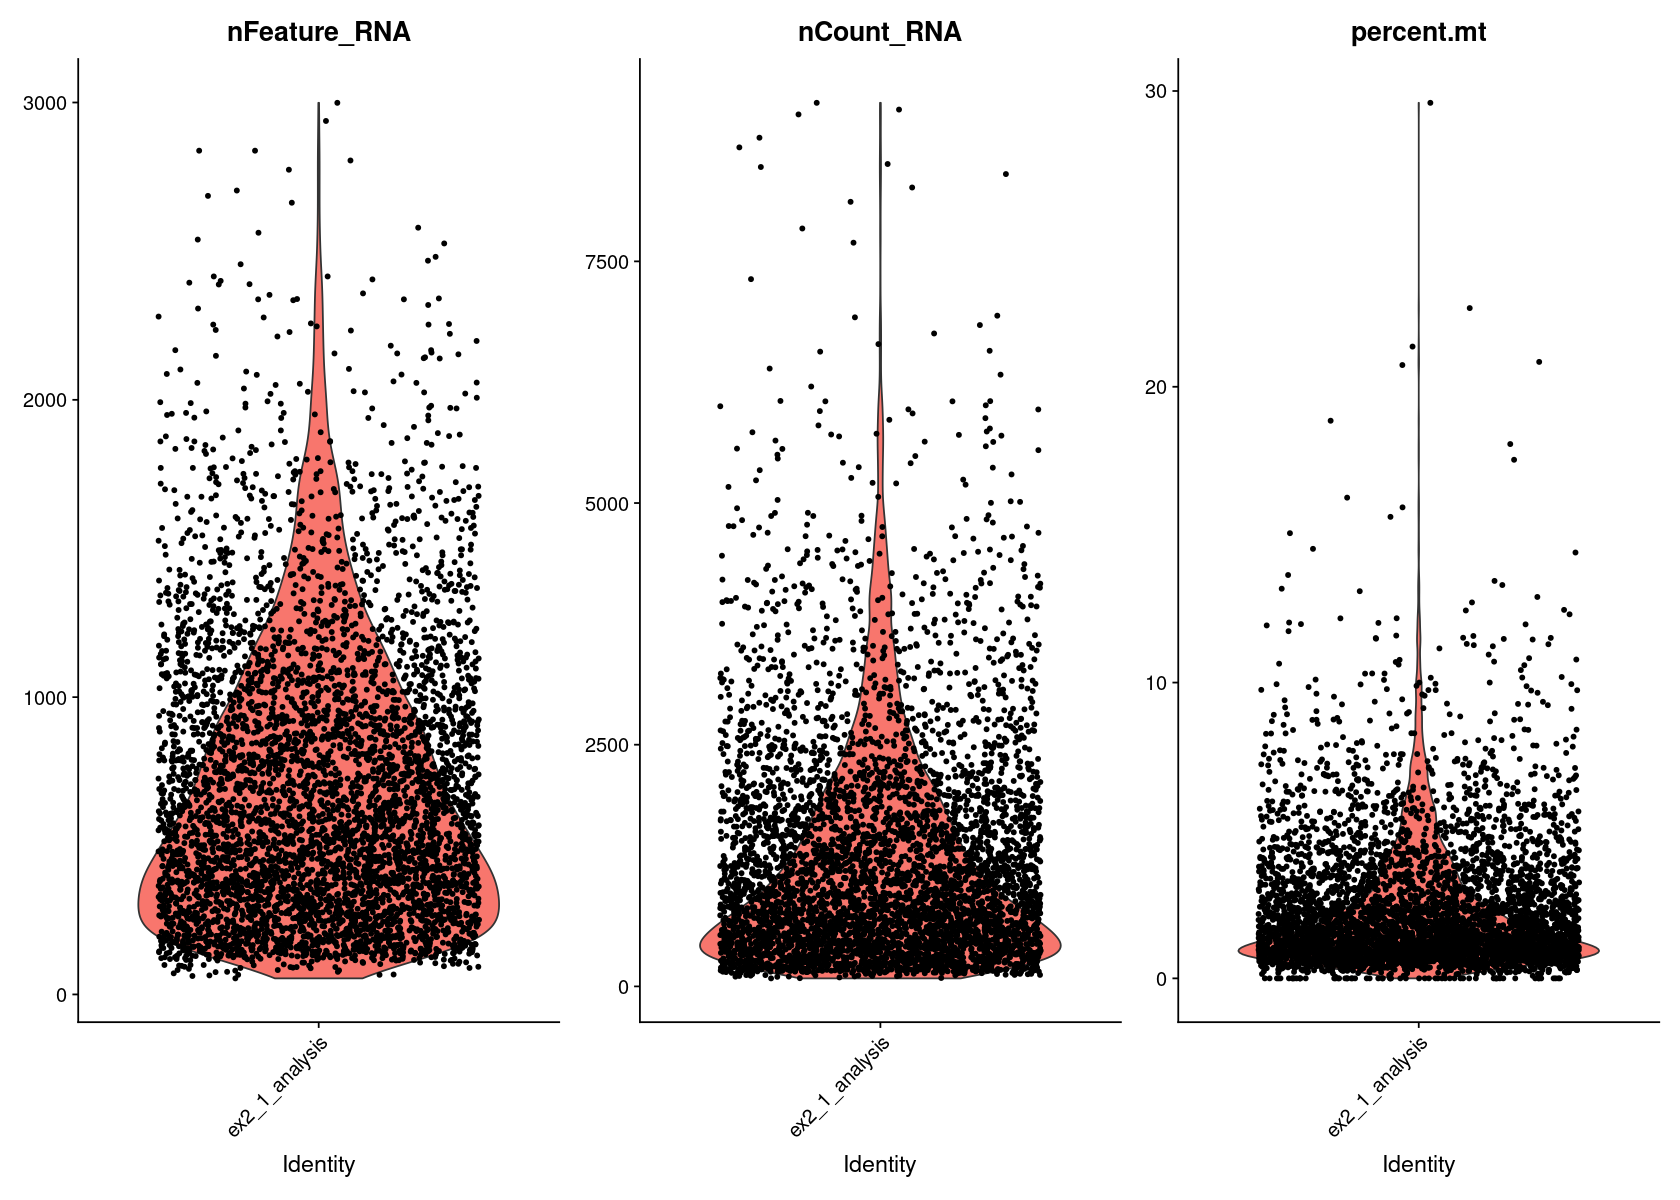

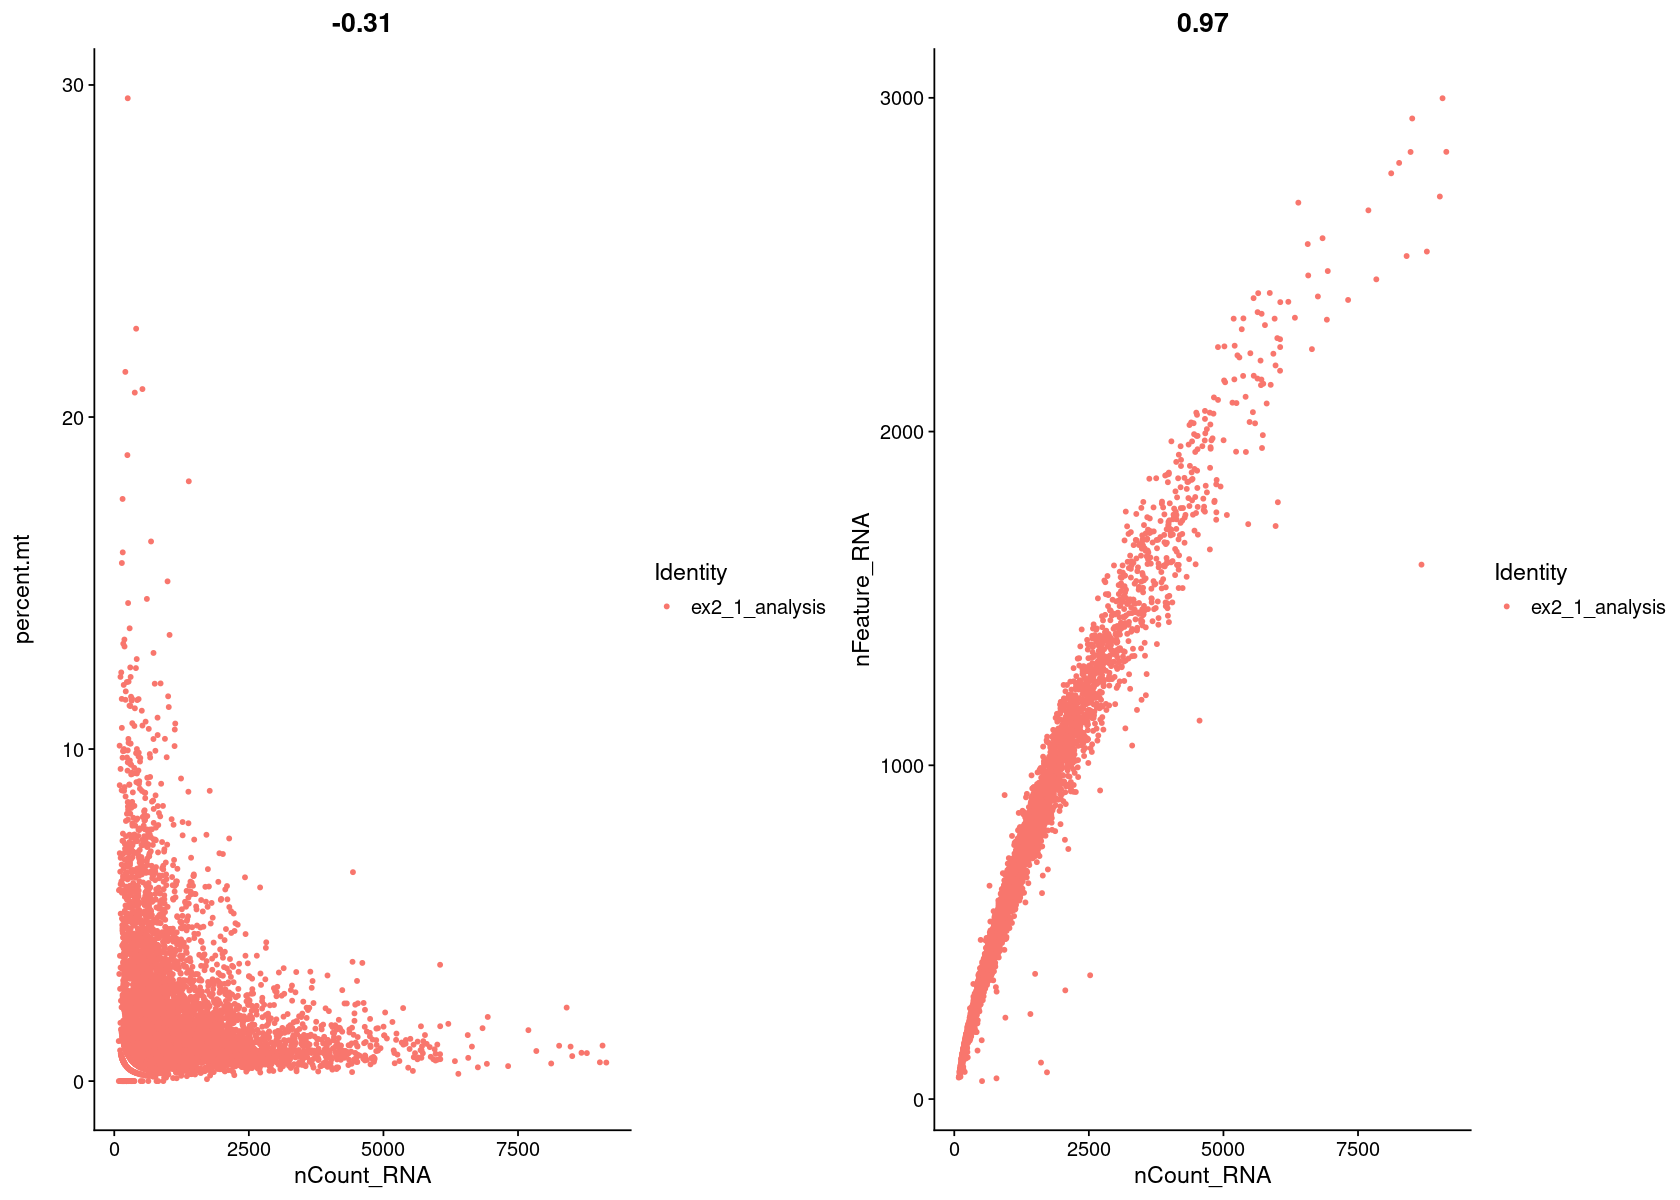

In [8]:
tmp <- subset(tmp, subset = nFeature_RNA > arg05 & nFeature_RNA < arg06 & nCount_RNA > arg07 & nCount_RNA < arg08 & percent.mt < arg09)
print(tmp)
VlnPlot(tmp, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

plot1 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


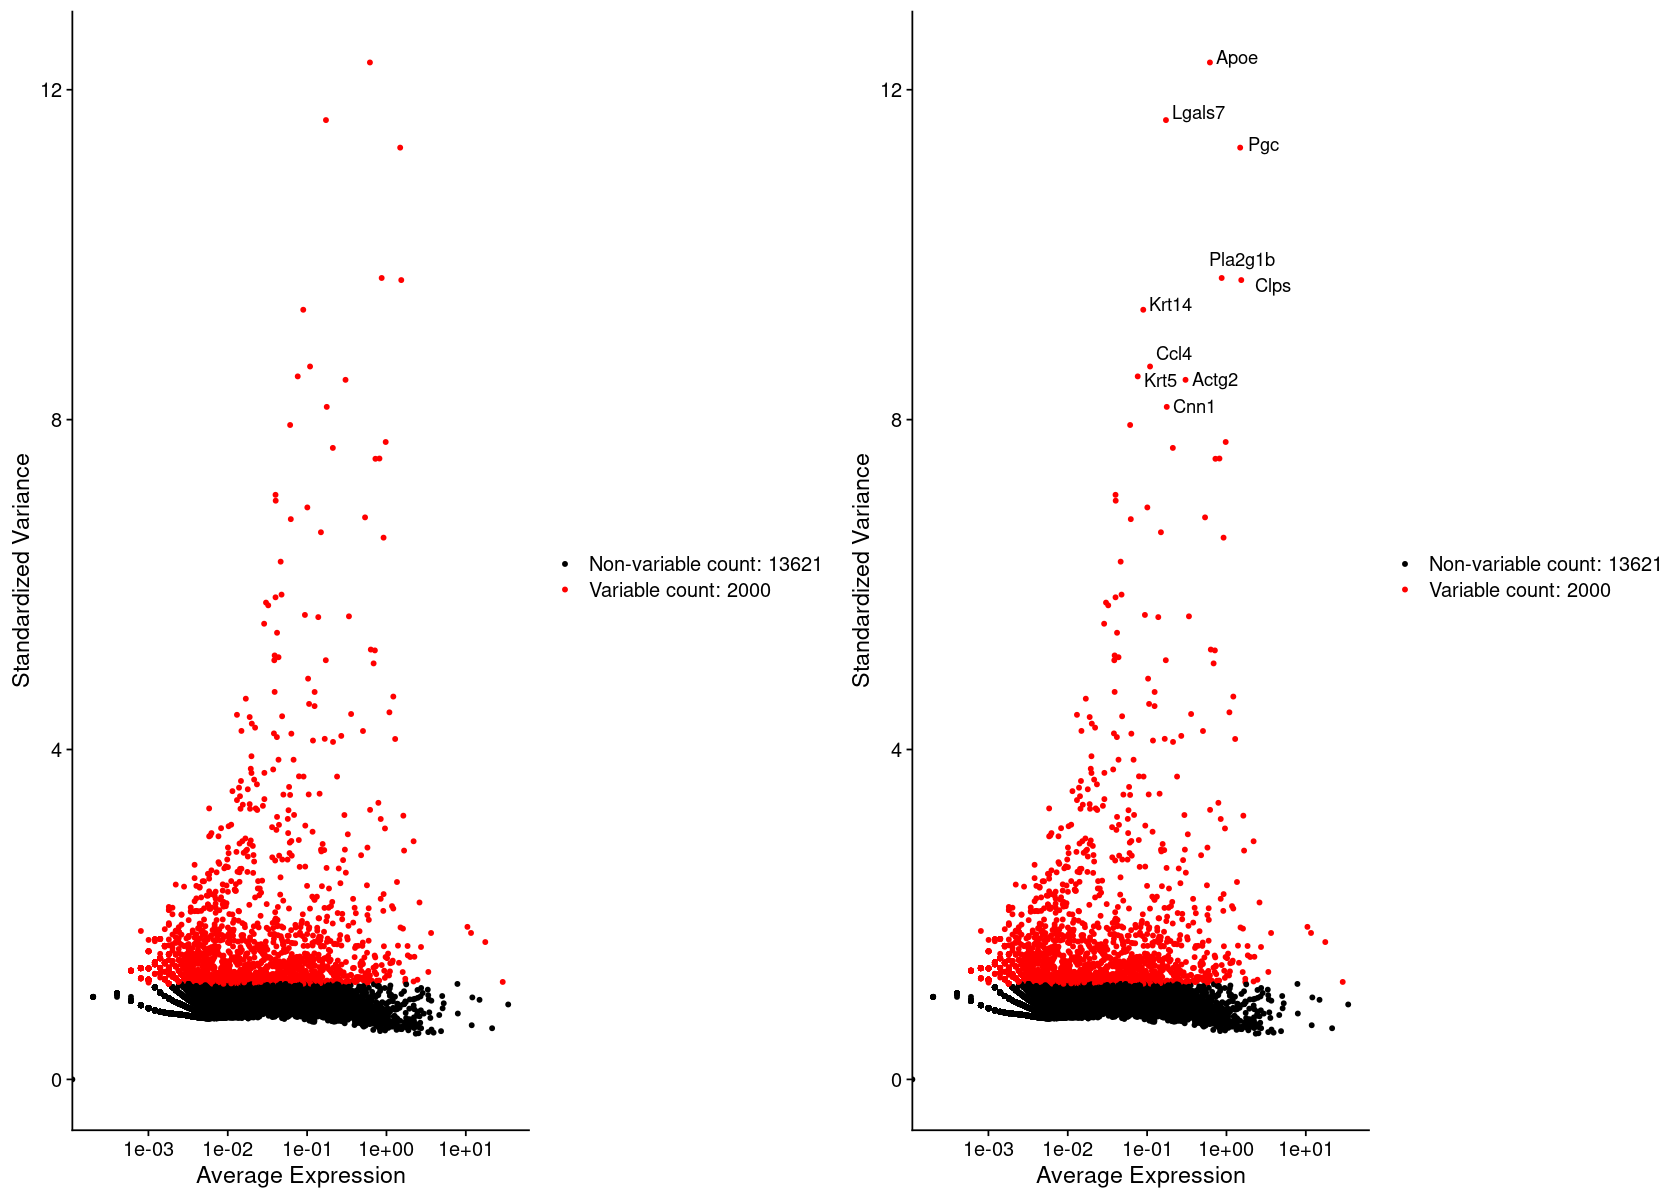

In [9]:
tmp <- NormalizeData(tmp, normalization.method = "LogNormalize", scale.factor = 10000)
tmp <- FindVariableFeatures(tmp, selection.method = "vst", nfeatures = 2000)
top10 <- head(VariableFeatures(tmp), 10)

plot1 <- VariableFeaturePlot(tmp)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
options(repr.plot.width=14)
CombinePlots(plots = list(plot1, plot2))

Centering and scaling data matrix

PC_ 1 
Positive:  Plvap, Fabp4, Flt1, Egfl7, Srgn, Gpr116, Pecam1, Rbp7, Cd36, Emcn 
	   Ehd4, Esam, Gimap6, Kdr, Ptprb, Slc9a3r2, Ctla2a, Nkx2-3, Apold1, Fam101b 
	   Cd200, Cdh5, Tm4sf1, Mmrn2, Sdpr, Podxl, Myct1, Efna1, Tmem88, Car4 
Negative:  Col3a1, Col1a2, Col1a1, Clec3b, Mfap5, Mgp, Meg3, Mfap4, Fbn1, Col14a1 
	   Fn1, Fstl1, Pi16, Igfbp6, Col8a1, Sfrp1, Cd55, Tnfaip6, Fndc1, Scara5 
	   Adamts2, Cd248, Nupr1, Ifi27l2a, Has1, Spon2, Gfpt2, C3, Cfh, Fmo2 
PC_ 2 
Positive:  Tagln, Acta2, Myl9, Myh11, Mylk, Lmod1, Actg2, Tpm2, Cnn1, Pdlim3 
	   Des, Tpm1, Nexn, Rgs5, Sh3bgr, Filip1l, Csrp1, Fbxl22, Cald1, Ppp1r14a 
	   Agt, Kcnmb1, Plac8, Tmem176b, Mustn1, Ctxn1, Fblim1, Tmem176a, Klhl23, Gm13889 
Negative:  Ly6a, Pi16, Has1, Fbn1, Col14a1, Gfpt2, Nfkbia, Ly6c1, Anxa2, Fn1 
	   Tnfaip6, Cxcl1, Ugdh, Col8a1, Scara5, Fndc1, Cd248, Clec3b, Mfap5, Cd55 
	   Sat1, Meg3, Igfbp6, Cdkn1a, C3, Mt2, Fbln2, Pcolce2, Uap1, Sema3c 
PC_ 3 
Positive:  C1qa, Pf4

PC_ 1 
Positive:  Plvap, Fabp4, Flt1, Egfl7, Srgn 
Negative:  Col3a1, Col1a2, Col1a1, Clec3b, Mfap5 
PC_ 2 
Positive:  Tagln, Acta2, Myl9, Myh11, Mylk 
Negative:  Ly6a, Pi16, Has1, Fbn1, Col14a1 
PC_ 3 
Positive:  C1qa, Pf4, Tyrobp, Ccl4, C1qb 
Negative:  Fabp4, Ly6c1, Plvap, Rbp7, Flt1 
PC_ 4 
Positive:  C1qa, Pf4, Tyrobp, Ccl4, C1qc 
Negative:  Acta2, Tagln, Myl9, Myh11, Tpm2 
PC_ 5 
Positive:  Fxyd3, Krt5, Lgals7, Sfn, Perp 
Negative:  Acta2, Tagln, Myh11, Myl9, Lmod1 


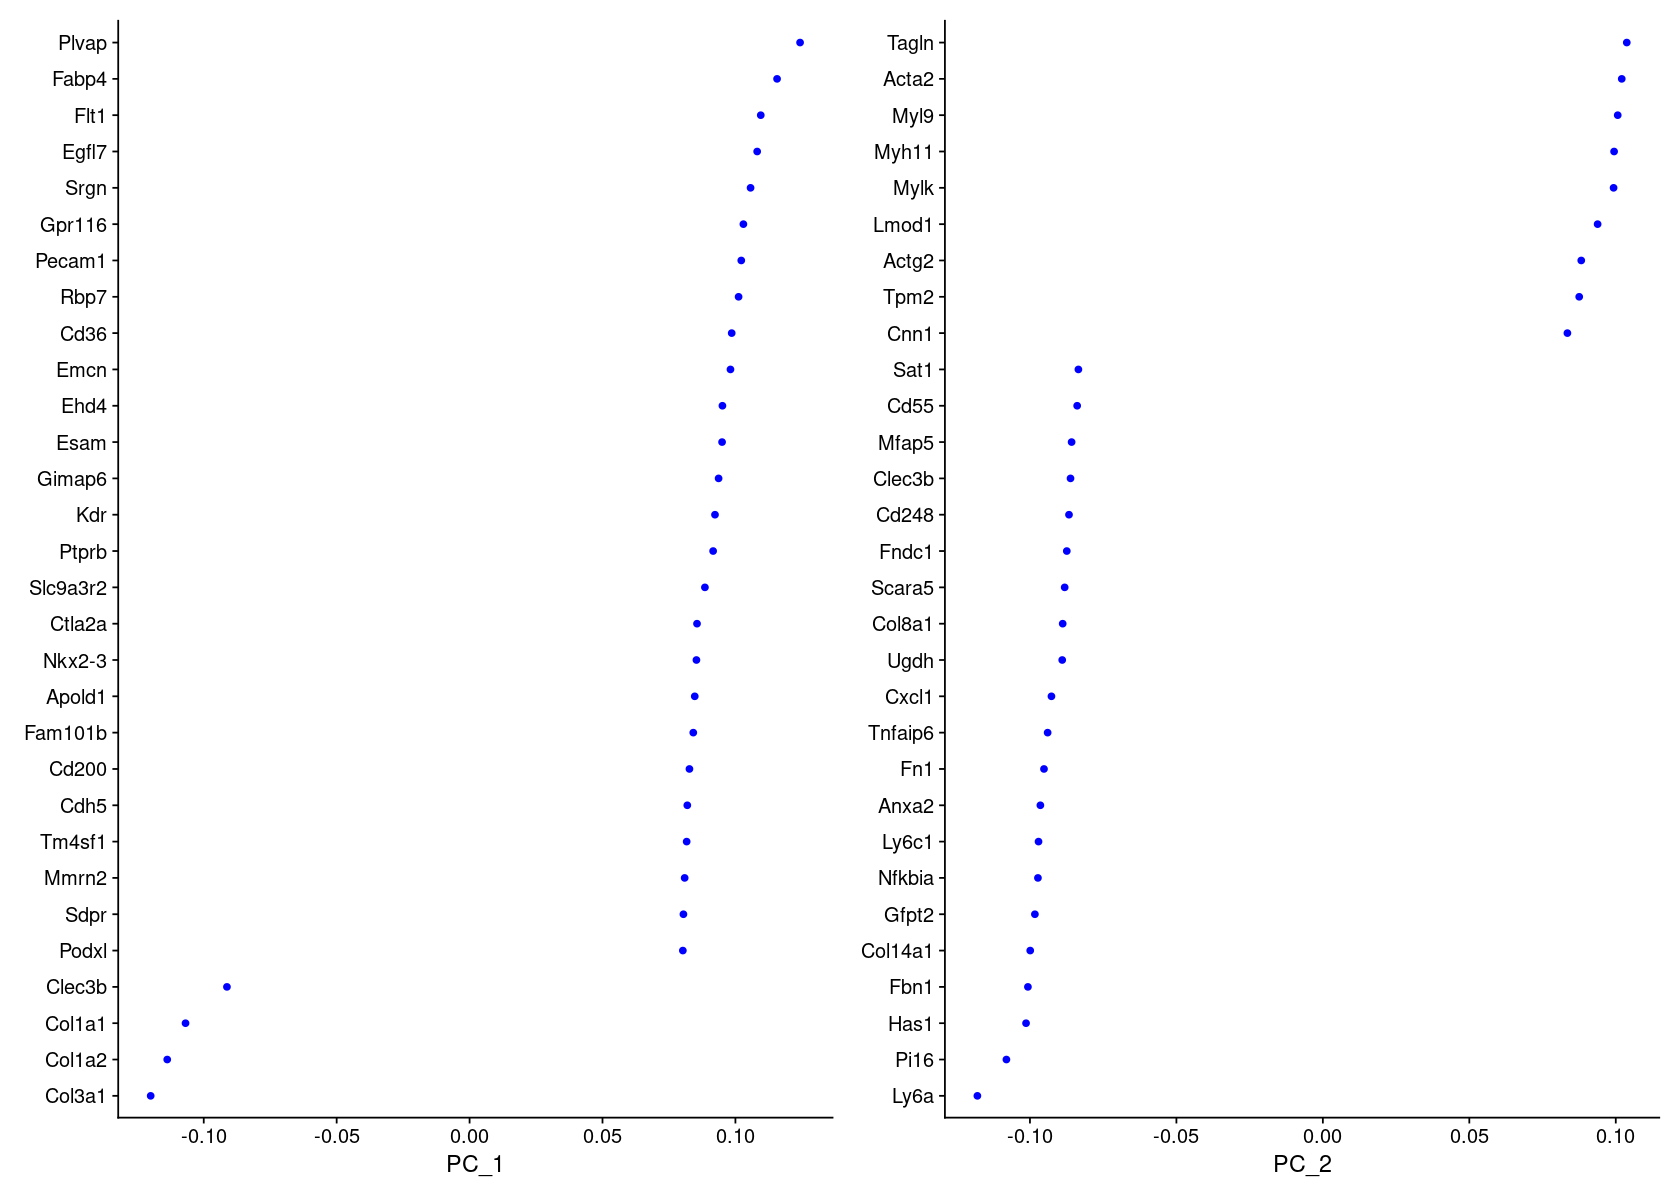

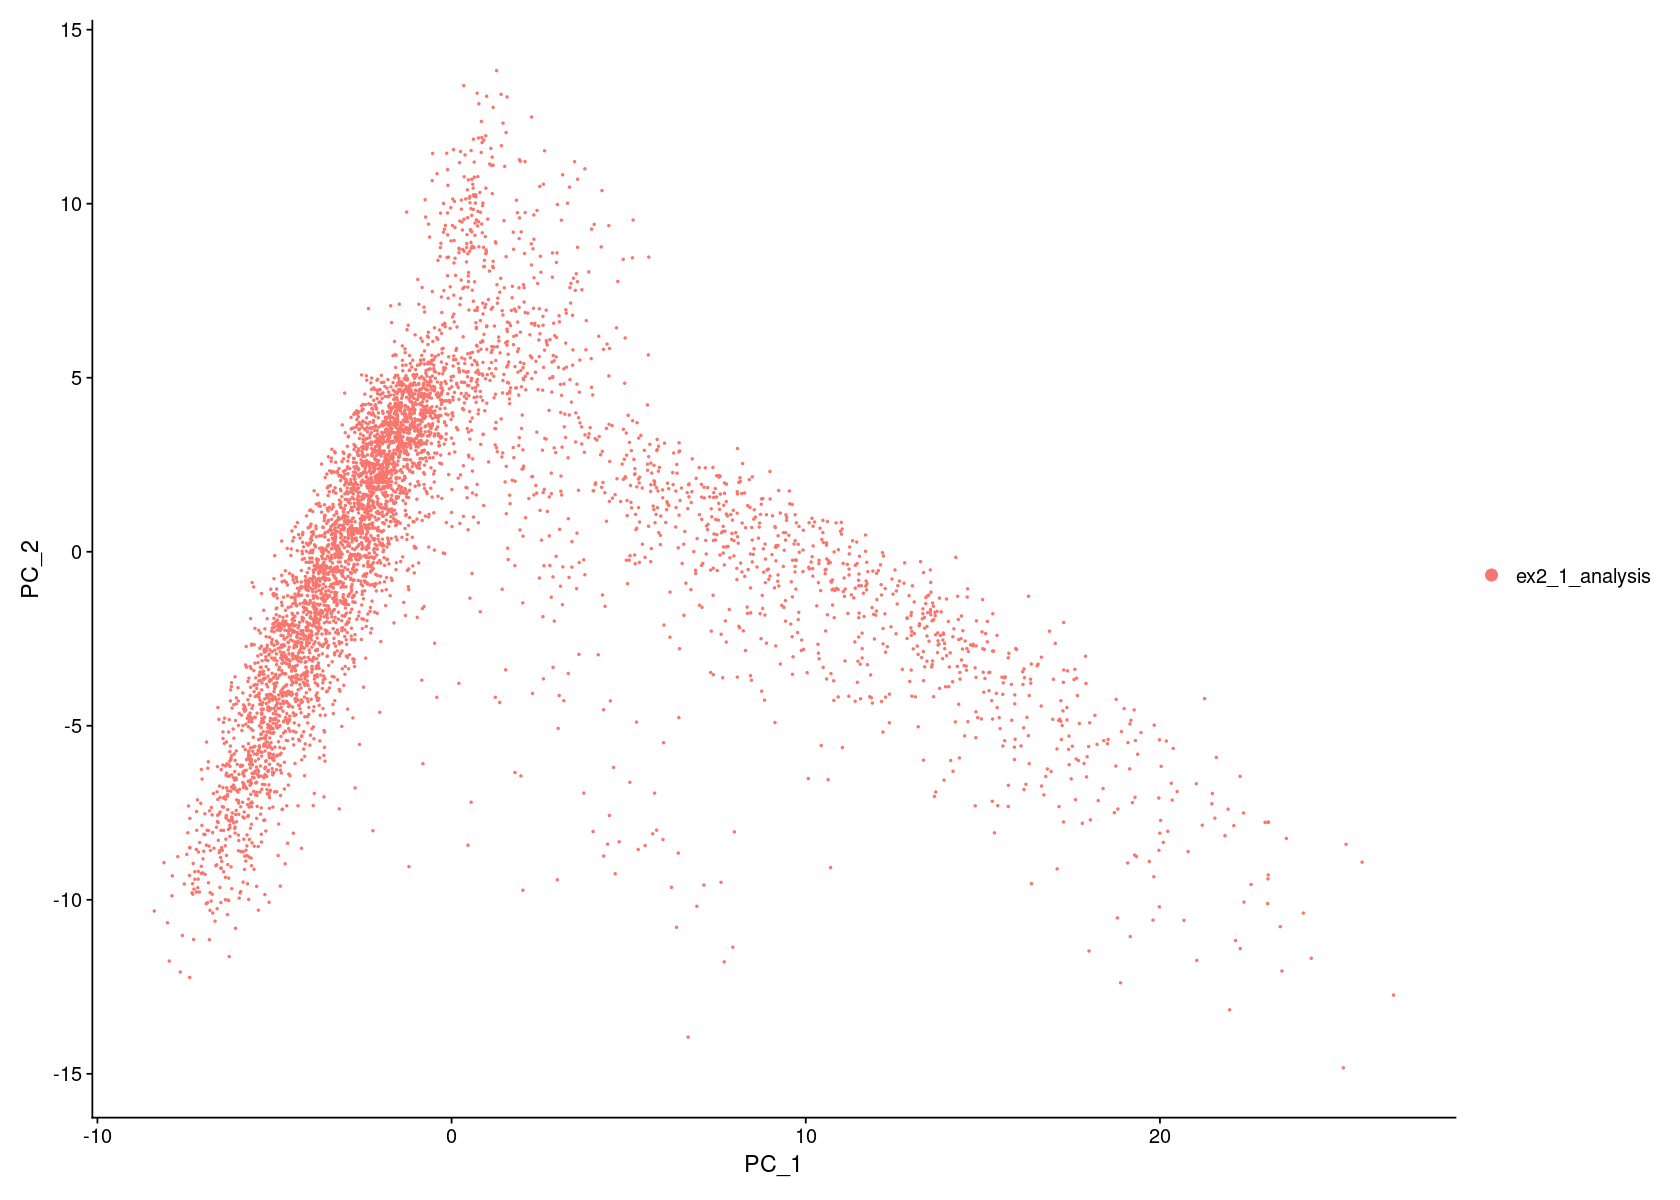

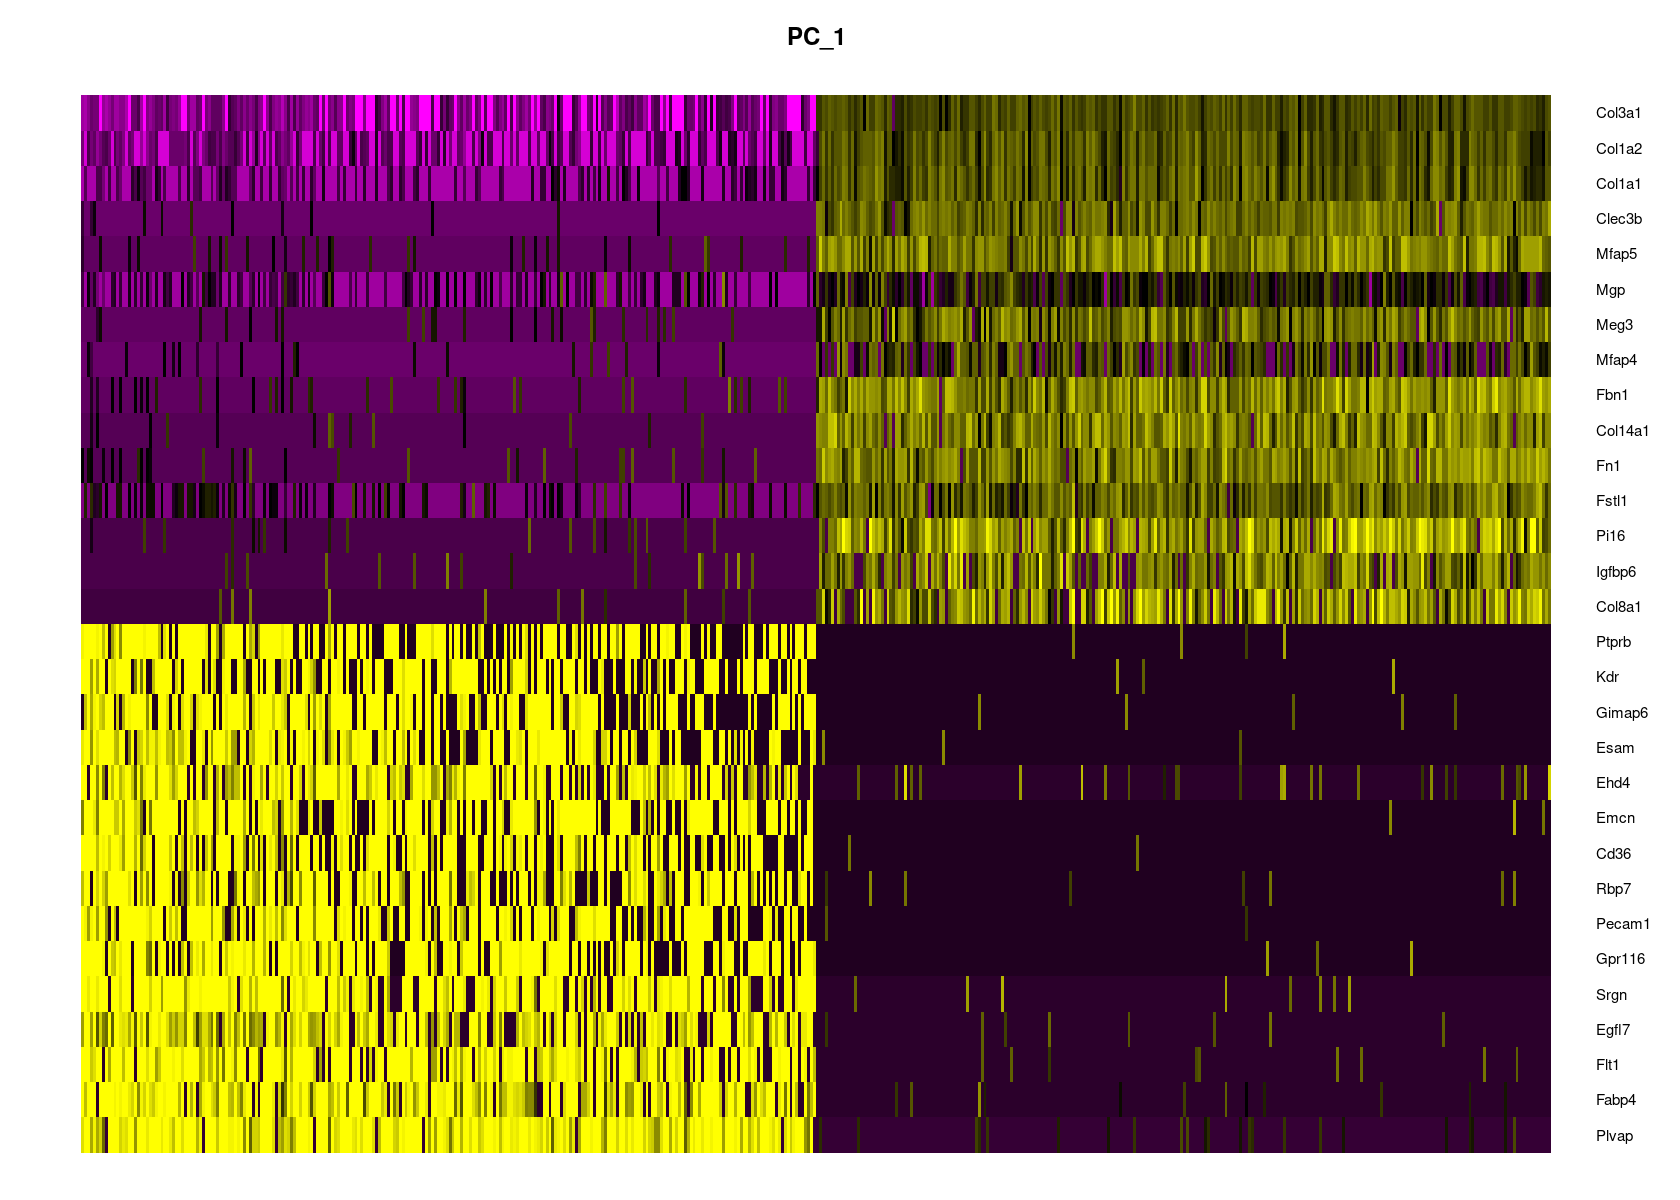

In [10]:
all.genes <- rownames(tmp)
tmp <- ScaleData(tmp, features=all.genes)

tmp <- RunPCA(tmp, features = VariableFeatures(object = tmp))
print(tmp[["pca"]], dims=1:5, nfeatures=5)

VizDimLoadings(tmp, dims=1:2, reduction="pca")

DimPlot(tmp, reduction="pca")

DimHeatmap(tmp, dims=1, cells=500, balanced=TRUE)

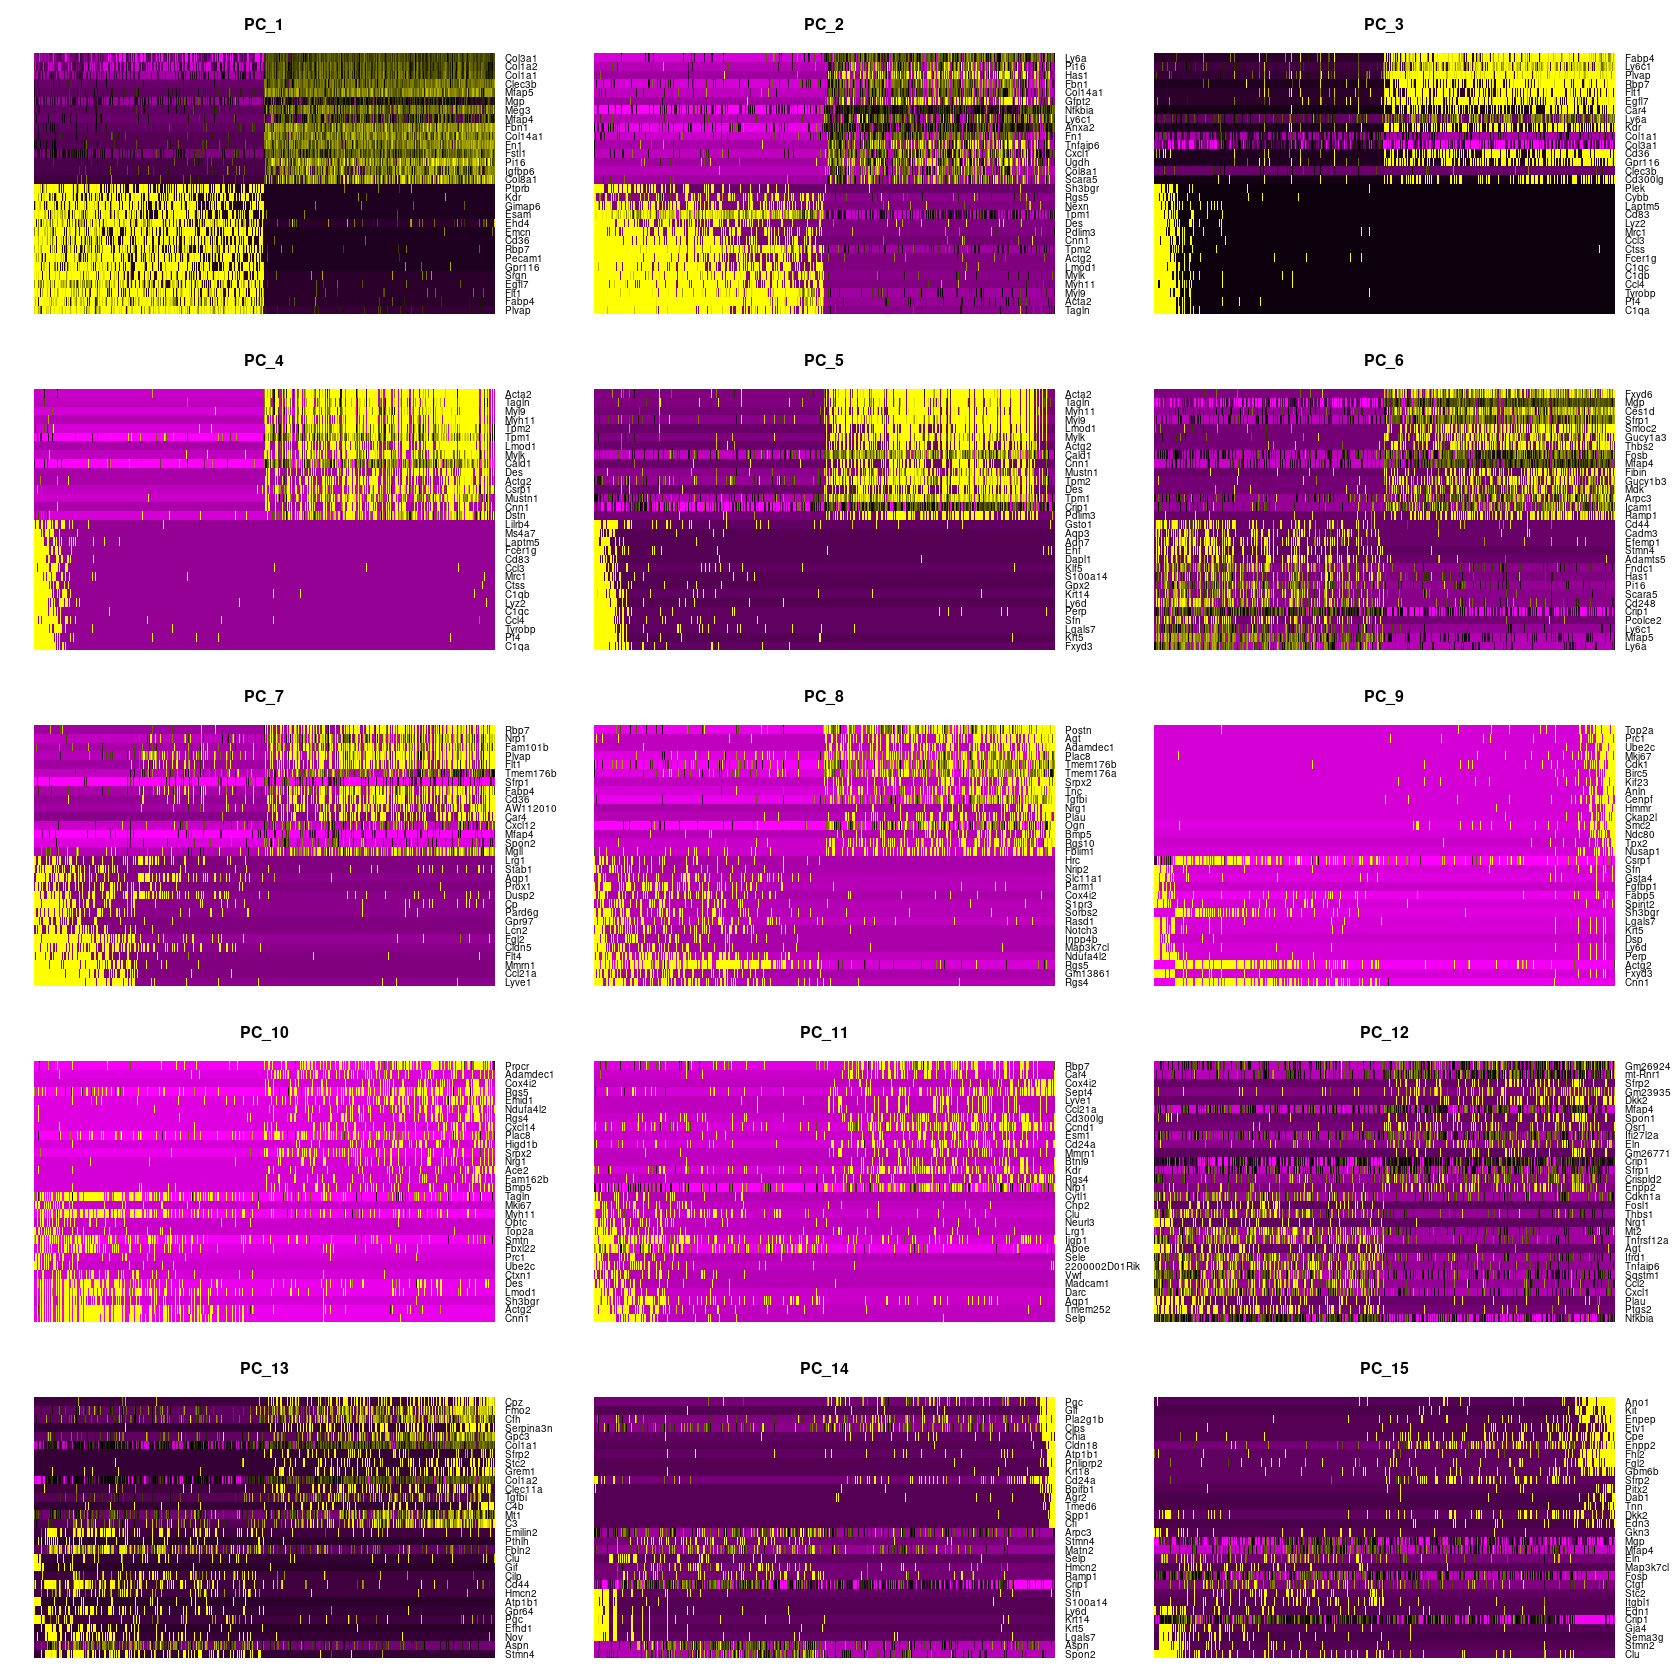

In [11]:
options(repr.plot.width=14, repr.plot.height=14)
DimHeatmap(tmp, dims=1:15, cells=500, balanced=TRUE)

Warning message:
“Removed 28158 rows containing missing values (geom_point).”


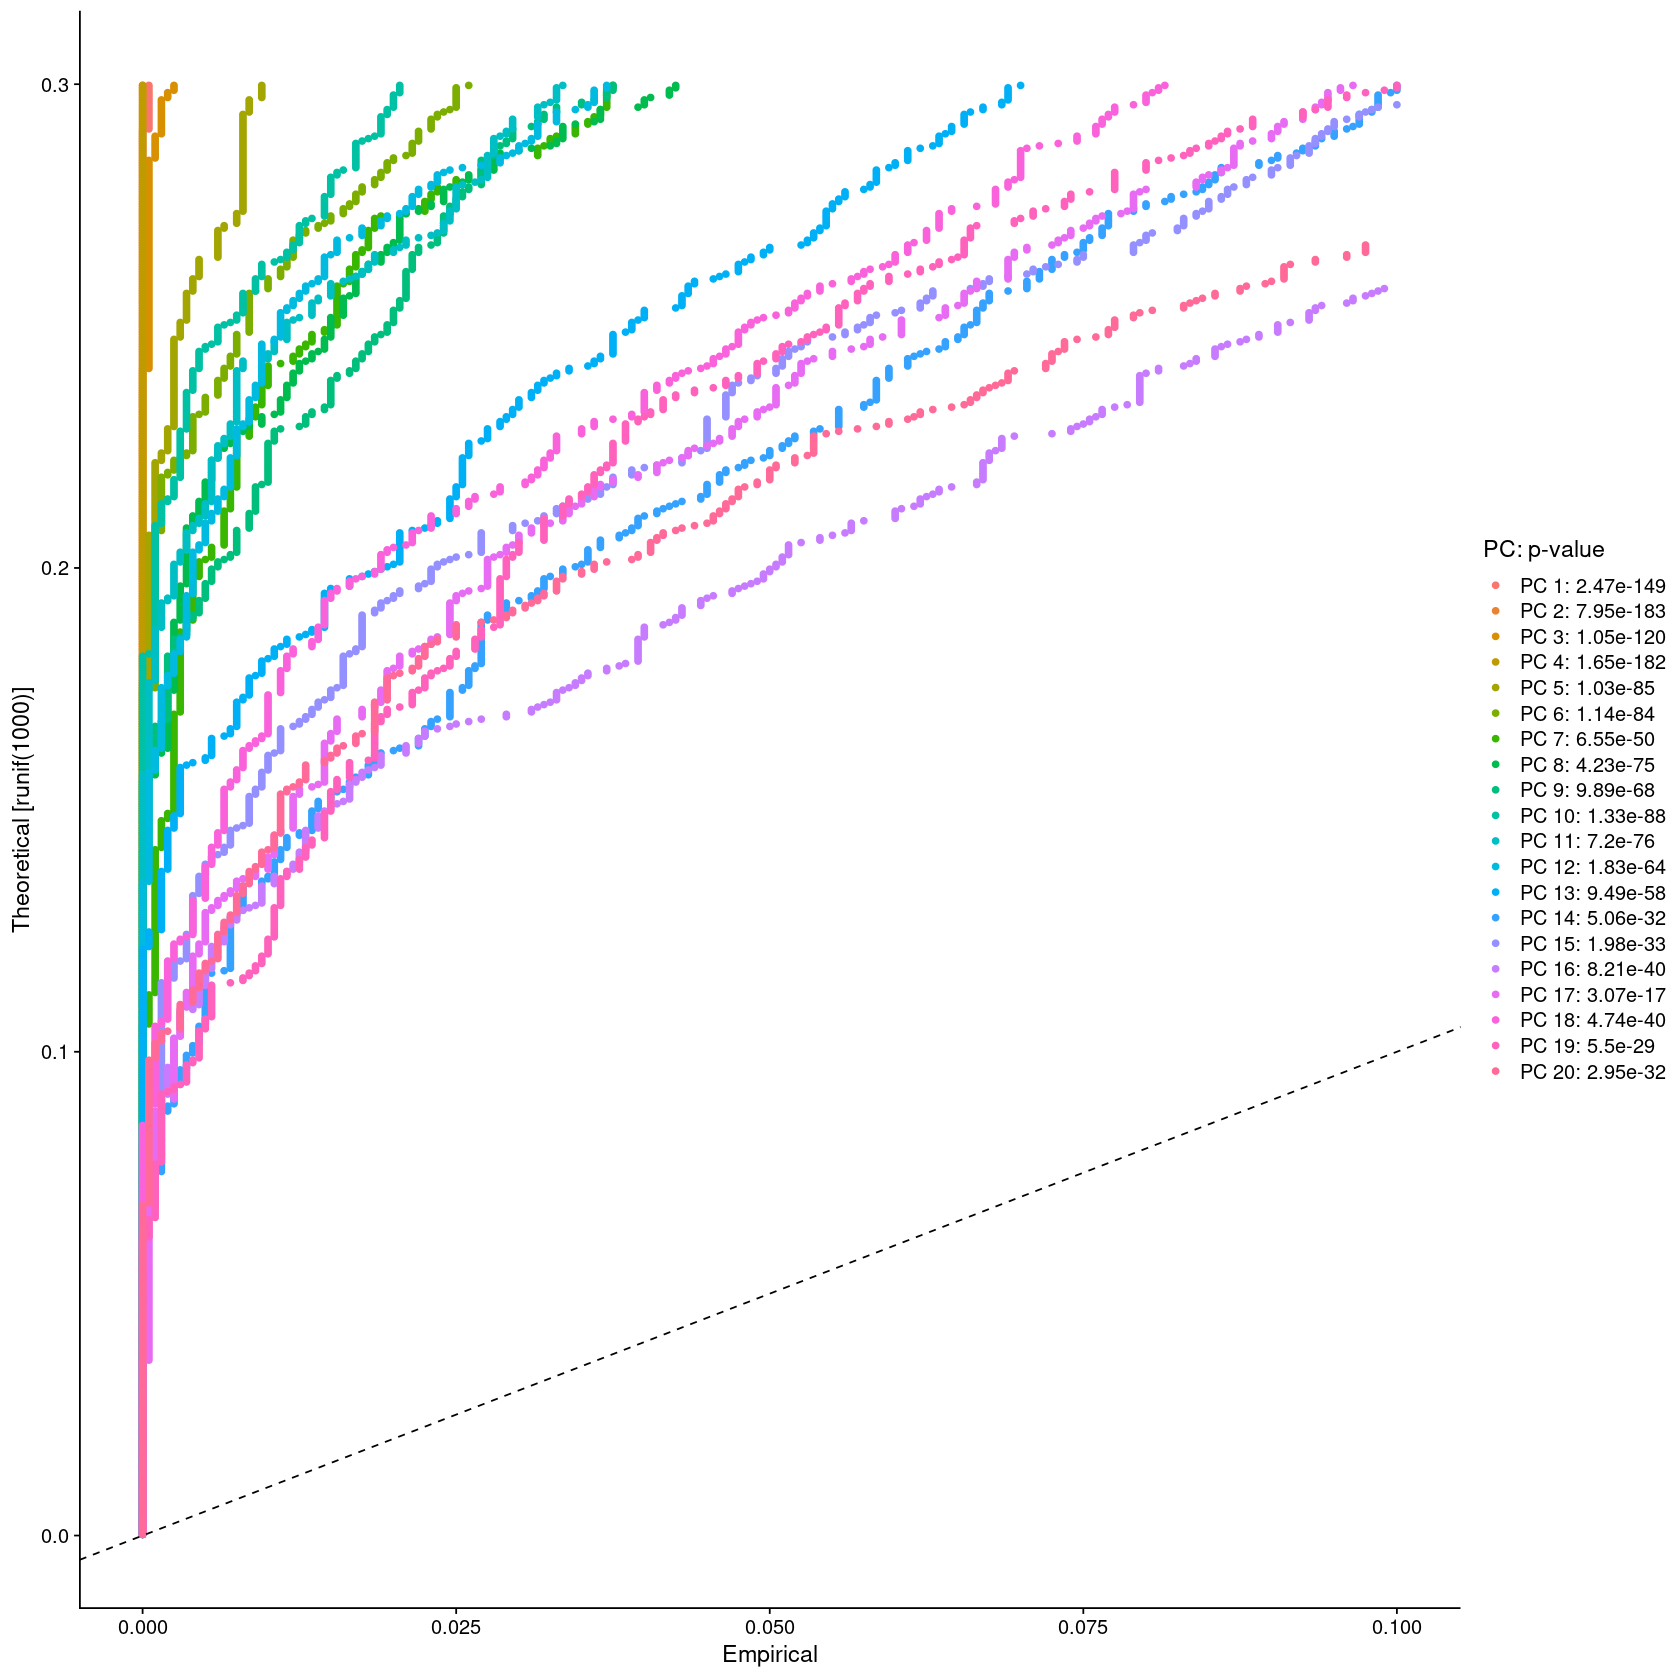

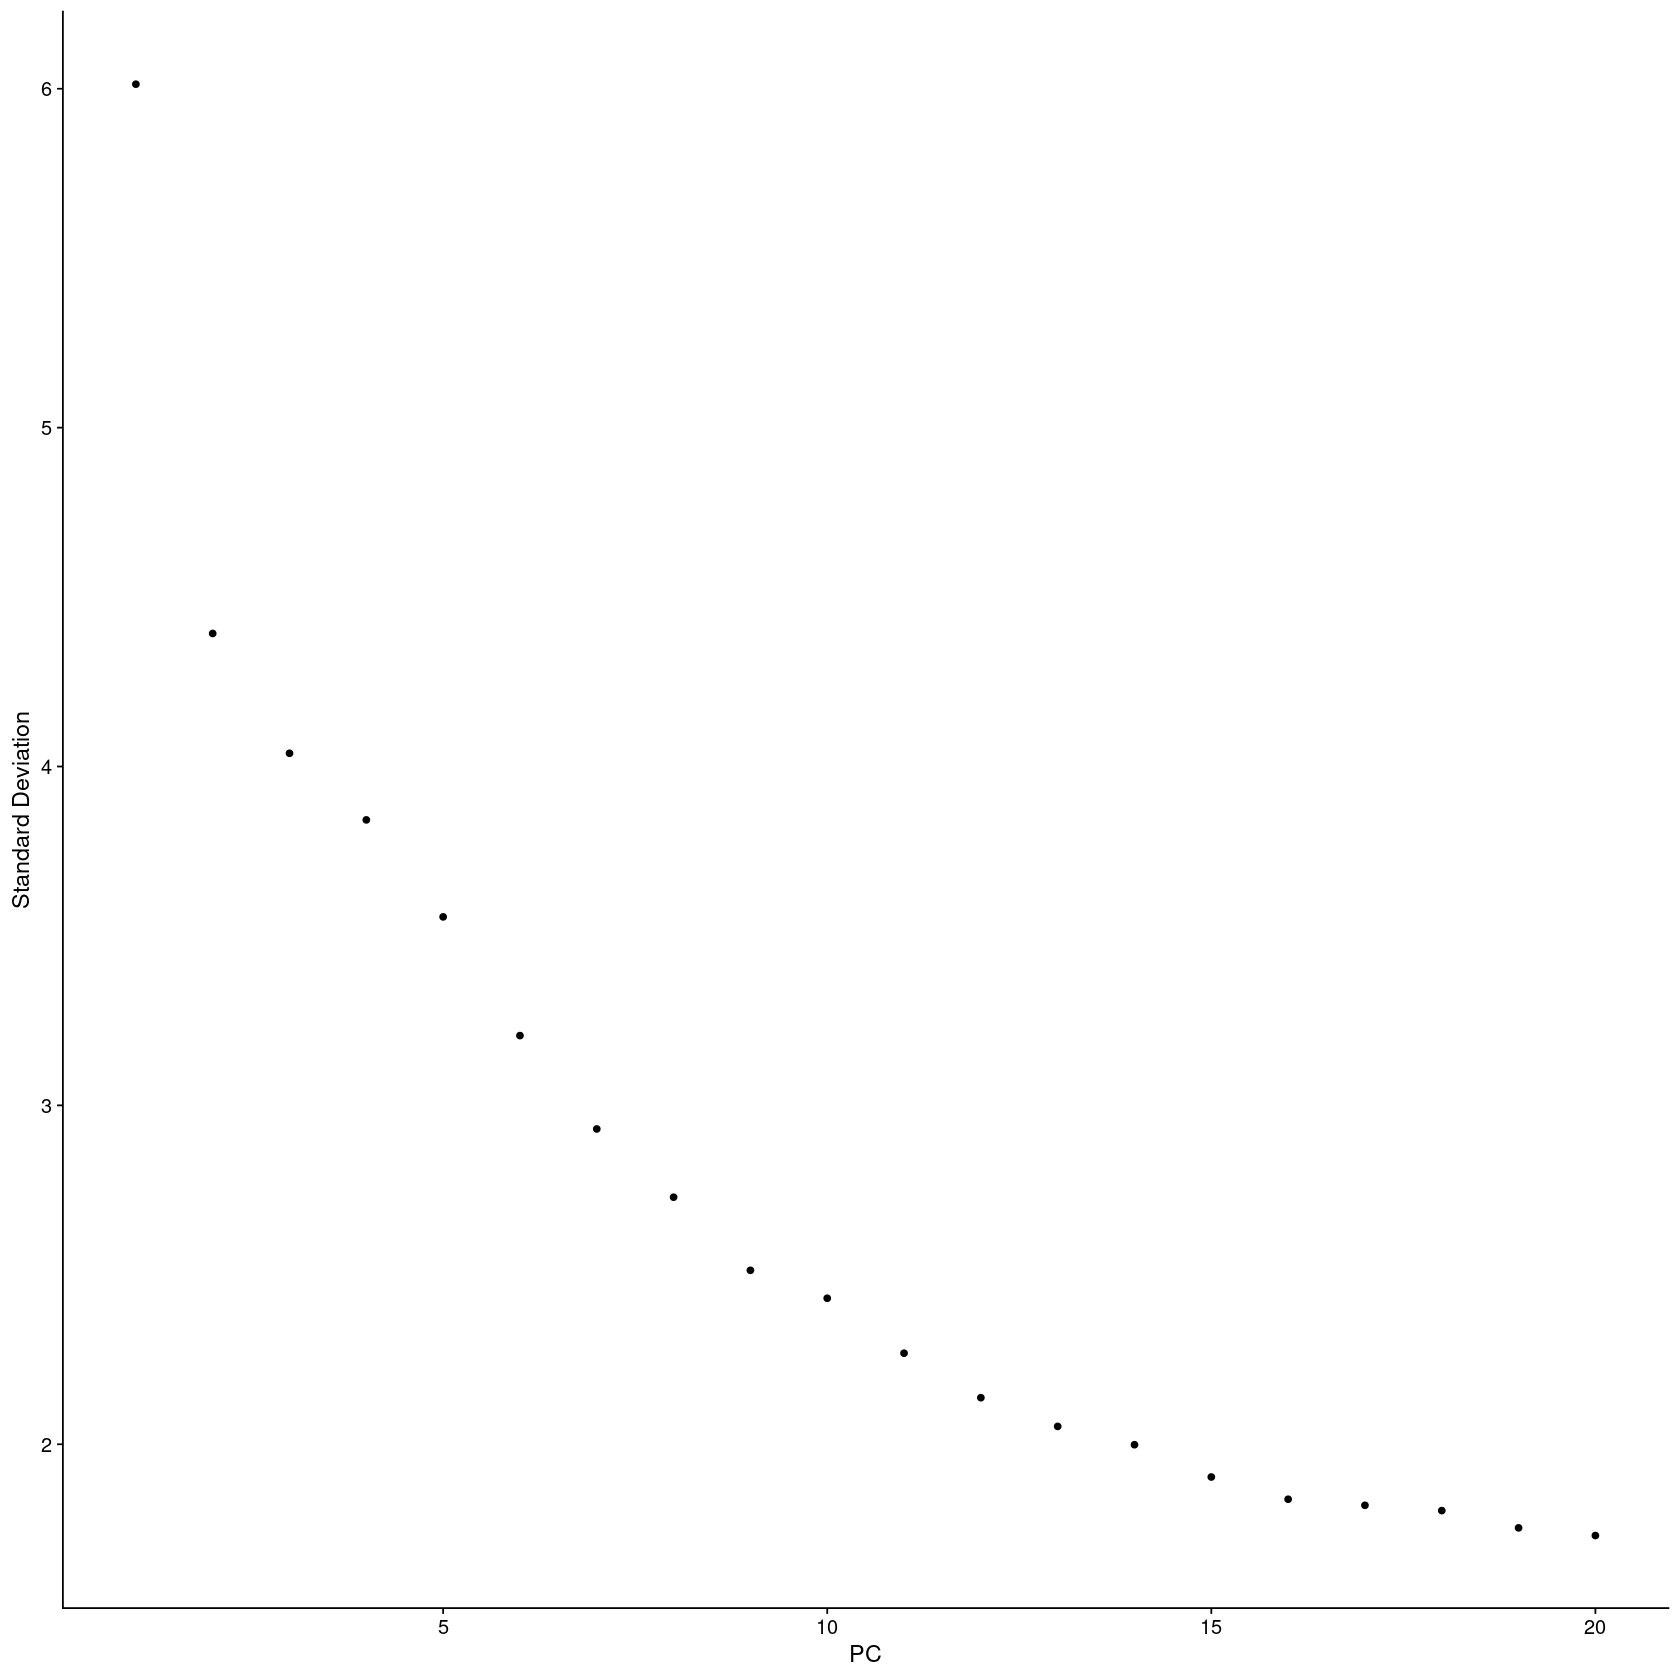

In [12]:
tmp <- JackStraw(tmp, num.replicate=100)
tmp <- ScoreJackStraw(tmp, dims=1:20)

JackStrawPlot(tmp, dims=1:20)

ElbowPlot(tmp)

In [13]:
arg10 <- 20 #maximum PC

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4977
Number of edges: 173586

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8407
Number of communities: 19
Elapsed time: 5 seconds


CGTGTTTTCAGT TTTCAACGCCCC TACCTCGCGGGC AACCGCCGTTCC TCCAGGGTCCCG 
          12            0           16            8           12 
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
23:14:27 UMAP embedding parameters a = 0.9922 b = 1.112

23:14:27 Read 4977 rows and found 20 numeric columns

23:14:27 Using Annoy for neighbor search, n_neighbors = 30

23:14:27 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

23:14:29 Writing NN index file to temp file /tmp/Rtmp6ONM4e/file7aab5636d455

23:14:29 Searching Annoy index using 1 thread, search_k = 3000

23:14:38 Annoy recall = 100%

23:14:39 Commencing smooth kNN distance calibration using 1 thread

23:14:40 Initializing fr

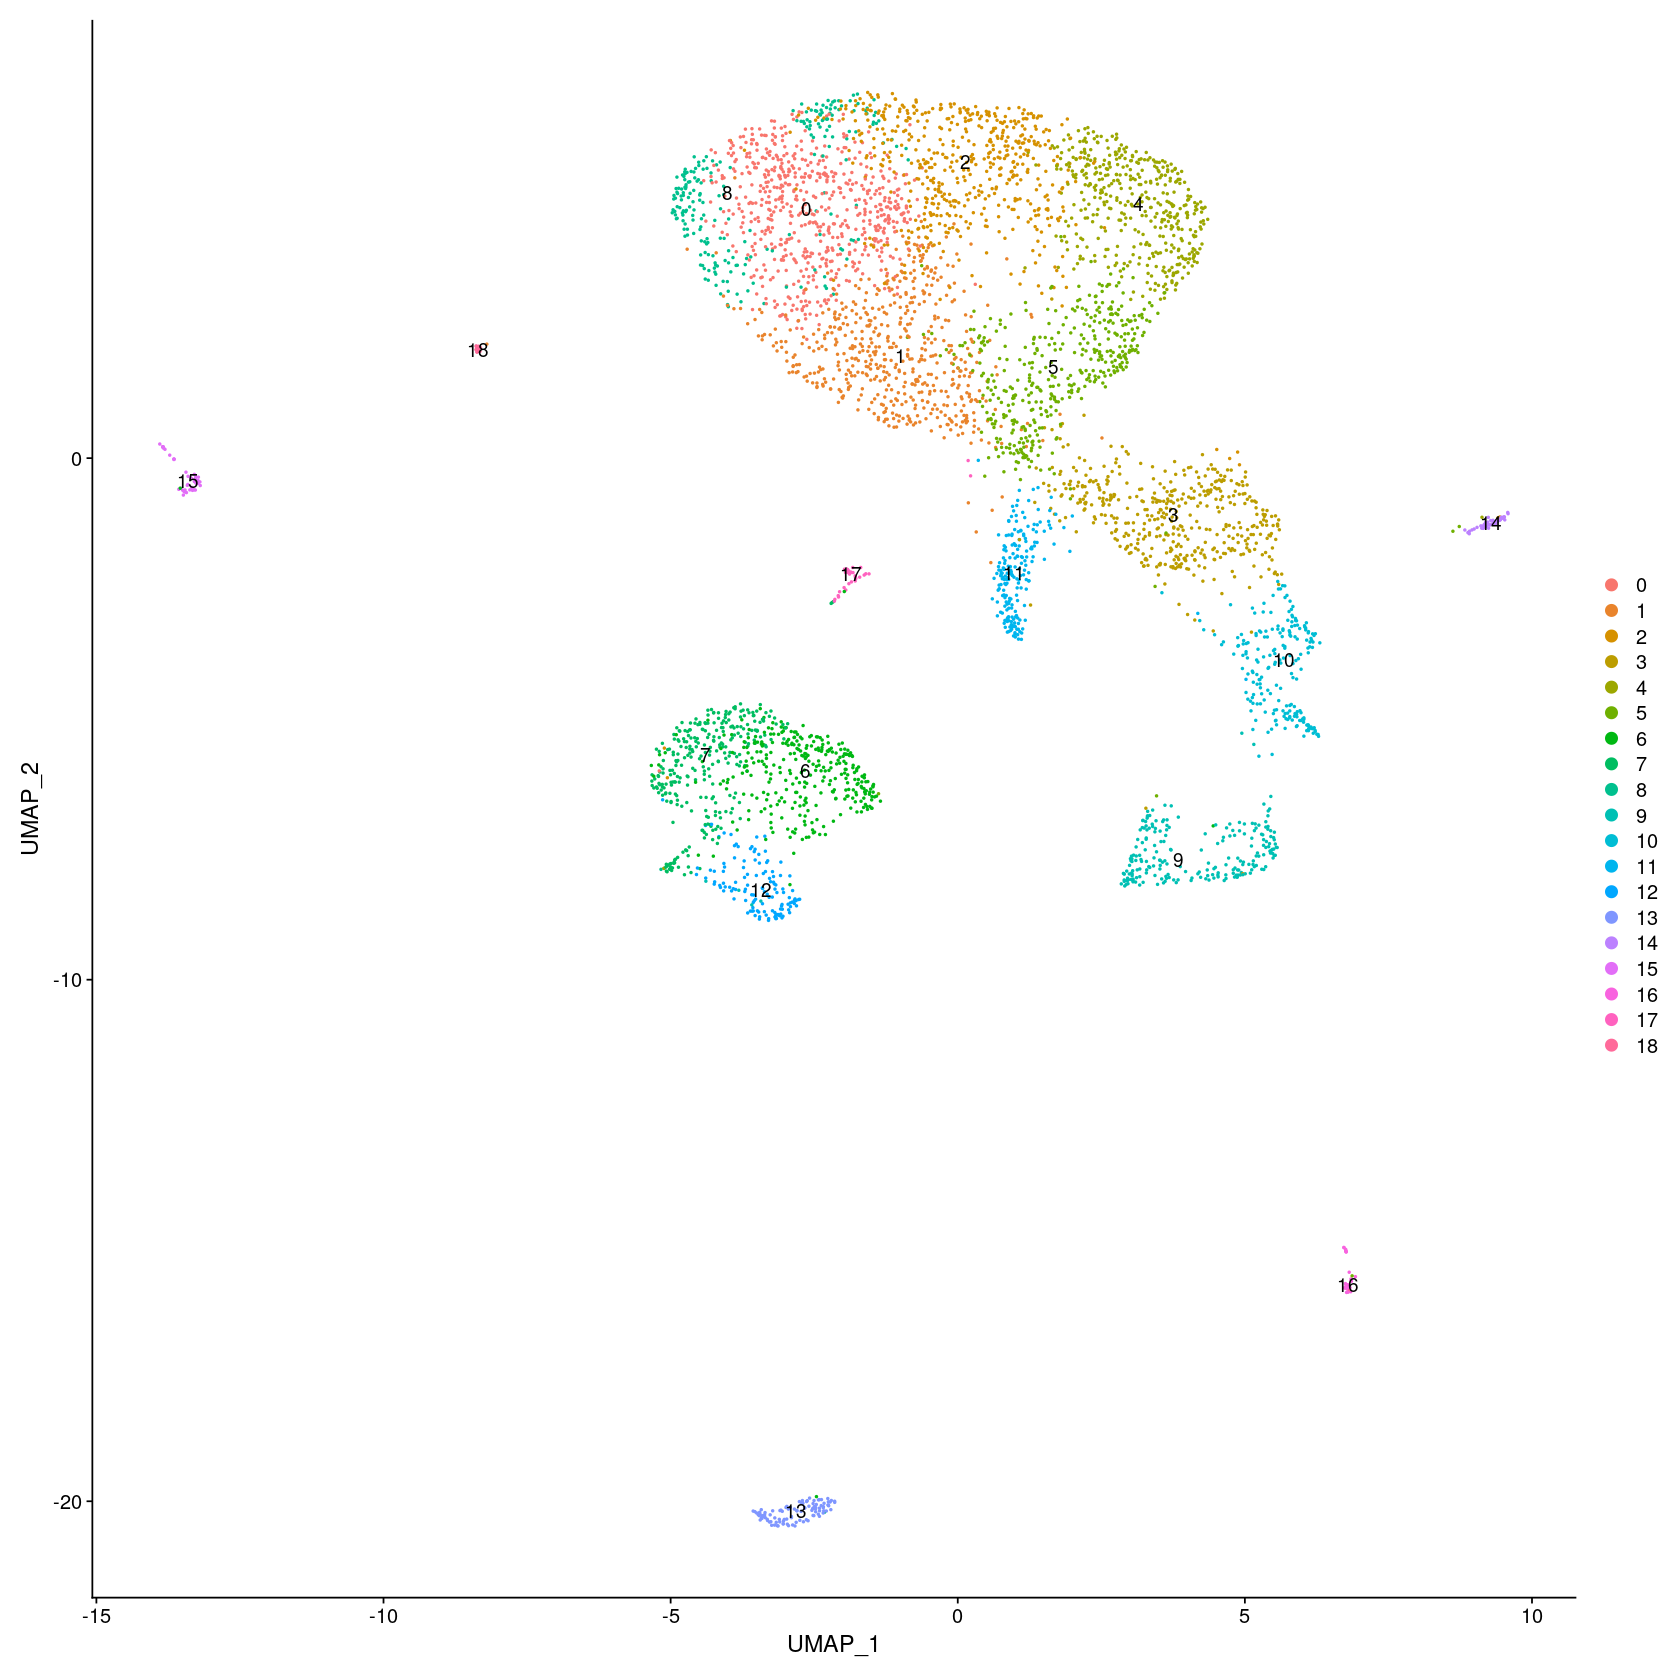

In [14]:
tmp <- FindNeighbors(tmp, dims=1:arg10)
tmp <- FindClusters(tmp, resolution=0.8)

head(Idents(tmp), 5)

tmp <- RunUMAP(tmp, dims=1:arg10)
DimPlot(tmp, reduction="umap", label=TRUE)

In [15]:
sample.markers <- FindAllMarkers(tmp, min.pct = 0.25, logfc.threshold = 0.25)
sample.markers %>% group_by(cluster) %>% top_n(n = 2, wt = avg_logFC)
markers10 <- sample.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18



p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
4.459255e-230,1.5812642,0.684,0.139,6.965803e-226,0,Has1
1.561963e-158,1.3837649,0.664,0.184,2.439943e-154,0,Tnfaip6
1.023545e-102,0.9289763,0.936,0.732,1.598879e-98,1,Col1a1
1.985796e-26,1.0188156,0.382,0.220,3.102011e-22,1,Fmo2
2.698902e-129,1.2554697,0.419,0.074,4.215954e-125,2,Cilp
1.202922e-92,0.9430737,0.392,0.087,1.879084e-88,2,C1qtnf3
3.294254e-291,2.1471939,0.368,0.009,5.145954e-287,3,Adamdec1
1.129866e-133,1.8484019,0.603,0.163,1.764963e-129,3,Postn
1.044444e-237,2.1429602,0.897,0.268,1.631526e-233,4,Ces1d


In [16]:
write.table(sample.markers, file=paste(arg03,'_all_markers.tsv',sep=''), sep='\t', na='', row.names=T, col.names=NA, quote=F)
write.table(markers10, file=paste(arg03,'_top10_markers.tsv',sep=''), sep='\t', na='', row.names=T, col.names=NA, quote=F)

In [18]:
saveRDS(tmp, file=arg04)

In [ ]:
#sample <- readRDS(file=args04)

In [ ]:
#From CellMarker
#cancer_marker <- list('CD44', 'CD22', 'SOX2', 'EPCAM')
#, 'ALDH1', 'CD133', 'ESA'
#for (i in cancer_marker){
#   p1 <- FeaturePlot(sample, features = i)
#    p2 <- VlnPlot(sample, features = i)
#    print(CombinePlots(plots = list(p1, p2)))
#}

In [ ]:
#From Dr.Nagasawa slide
#cancer_marker <- list('VIM', 'CD22', 'SOX2', 'EPCAM')
#, 'ALDH1', 'CD133', 'ESA'
#for (i in cancer_marker){
#    p1 <- FeaturePlot(sample, features = i)
#    p2 <- VlnPlot(sample, features = i)
#    print(CombinePlots(plots = list(p1, p2)))
#}